Part 1): Data preparation and preprocessing.
- Perform data preparation and preprocessing for your analysis. 
- Submit your Jupyter notebook in your Github repository

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

In [2]:
# Loading the file

# df = pd.read_csv("data.csv", index_col=0) # The Id Col is now the index
df = pd.read_csv("data.csv")
df['Date'] = pd.to_datetime(df['Date']) # The data is changed to datetime var type
print("Dataframe shape = ",df.shape) # print the shape of the data 
# df = df.dropna()
# The 
df.head()

E:\Programs\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (0,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Dataframe shape =  (318477, 13)


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType
0,37404348,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Sydney,North West & Hills District,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
1,37404337,Casual Stock Replenisher,Aldi Stores,2018-10-07 00:00:00+00:00,Richmond & Hawkesbury,NaN,Retail & Consumer Products,Retail Assistants,Our Casual Stock Replenishers pride themselves...,NaN,0,30,NaN
2,37404356,RETAIL SALES SUPERSTARS and STYLISTS Wanted - ...,LB Creative Pty Ltd,2018-10-07 00:00:00+00:00,Brisbane,CBD & Inner Suburbs,Retail & Consumer Products,Retail Assistants,BRAND NEW FLAGSHIP STORE OPENING - SUNSHINE PLAZA,NaN,0,30,NaN
3,37404330,Team member - Belrose,Anaconda Group Pty Ltd,2018-10-07 00:00:00+00:00,Gosford & Central Coast,NaN,Retail & Consumer Products,Retail Assistants,Bring it on - do you love the great outdoors a...,NaN,0,30,NaN
4,37404308,"Business Banking Contact Centre Specialist, Ni...",Commonwealth Bank - Business & Private Banking,2018-10-07 00:00:00+00:00,Sydney,Ryde & Macquarie Park,Call Centre & Customer Service,Sales - Inbound,"We are seeking highly articulate, enthusiastic...",NaN,0,30,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318477 entries, 0 to 318476
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   Id                 318477 non-null  object             
 1   Title              318477 non-null  object             
 2   Company            306473 non-null  object             
 3   Date               318477 non-null  datetime64[ns, UTC]
 4   Location           197229 non-null  object             
 5   Area               122658 non-null  object             
 6   Classification     197229 non-null  object             
 7   SubClassification  197229 non-null  object             
 8   Requirement        318470 non-null  object             
 9   FullDescription    302302 non-null  object             
 10  LowestSalary       318477 non-null  int64              
 11  HighestSalary      318477 non-null  int64              
 12  JobType            302379 non-

## Looking at the each job and the number of postings

Text(0, 0.5, 'Classification')

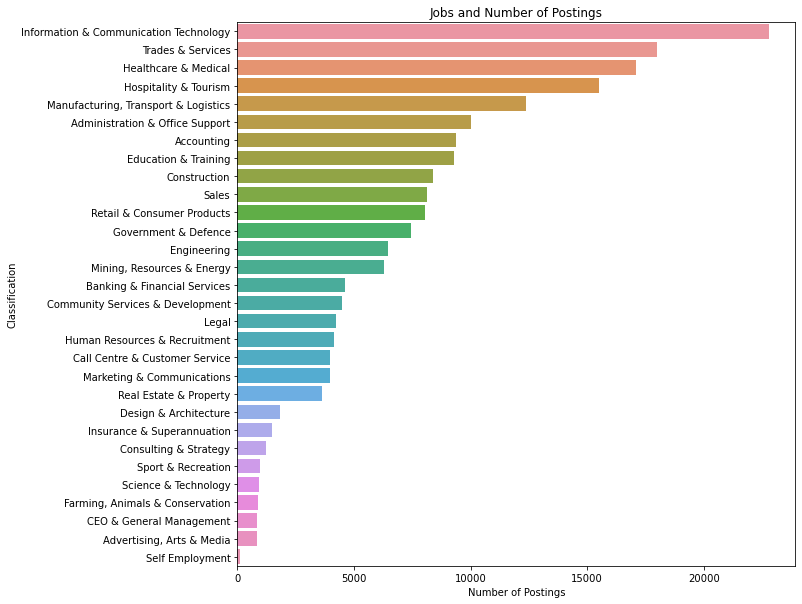

In [4]:
by_class = df.groupby(['Classification'], as_index = False)['Id'].count().sort_values(by='Id', ascending=False)
fig = plt.figure(figsize=(10, 10))
sns.barplot(data=by_class, x=by_class.Id, y=by_class.Classification)
plt.title("Jobs and Number of Postings")
plt.xlabel("Number of Postings")
plt.ylabel("Classification")

## Looking at the job posts by salary range

In [59]:
by_lowSal = df.groupby(['LowestSalary'], as_index=False).count()
by_lowSal['labels'] = by_lowSal['LowestSalary']
by_lowSal.head()

,LowestSalary,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,HighestSalary,JobType,labels
0,0,62639,62639,59611,62639,38541,24399,38541,38541,62637,56065,62639,56080,0
1,30,23476,23476,22296,23476,16396,9811,16396,16396,23476,22092,23476,22094,30
2,40,34436,34436,32076,34436,21736,13264,21736,21736,34435,33580,34436,33585,40
3,50,27027,27027,25679,27027,16561,10755,16561,16561,27026,26206,27027,26222,50
4,60,28499,28499,27290,28499,18121,11393,18121,18121,28499,27544,28499,27566,60


Text(0.5, 1.0, 'Job Posts by Salary Range')

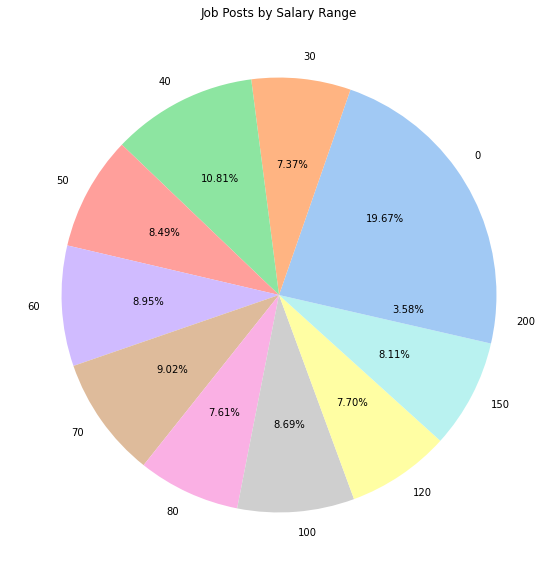

In [6]:
colors = sns.color_palette('pastel')[0:13]
fig = plt.figure(figsize=(10, 10))
plt.pie(data=by_lowSal, x=by_lowSal.Id, labels=by_lowSal.labels, colors=colors, autopct='%0.2f%%')
plt.title("Job Posts by Salary Range")

In [7]:
%matplotlib inline
matplotlib.patches.Circle(xy = (by_lowSal.Id, by_lowSal.labels))

## Looking at the top locations for employment

In [8]:
%matplotlib inline
locationDf = df[df['Location'].isna()==False]
locationDf = locationDf.groupby('Location').count()
locationDf['Location'] = locationDf.index
locationDf['Count'] = locationDf["Id"]
locationDf.head(10)

,Id,Title,Company,Date,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,Location,Count
Location,,,,,,,,,,,,,,
ACT,6250,6250,6150,6250,0,6250,6250,6250,5805,6250,6250,5807,ACT,6250
Adelaide,6653,6653,6303,6653,0,6653,6653,6653,6312,6653,6653,6313,Adelaide,6653
Adelaide Hills & Barossa,193,193,186,193,0,193,193,193,182,193,193,182,Adelaide Hills & Barossa,193
Albany & Great Southern,150,150,149,150,0,150,150,150,134,150,150,134,Albany & Great Southern,150
Albury Area,416,416,404,416,0,416,416,416,407,416,416,407,Albury Area,416
Alice Springs & Central Australia,301,301,287,301,0,301,301,301,280,301,301,280,Alice Springs & Central Australia,301
Bairnsdale & Gippsland,378,378,371,378,0,378,378,378,363,378,378,363,Bairnsdale & Gippsland,378
Ballarat & Central Highlands,603,603,580,603,0,603,603,603,566,603,603,566,Ballarat & Central Highlands,603
"Bendigo, Goldfields & Macedon Ranges",808,808,788,808,0,808,808,808,760,808,808,760,"Bendigo, Goldfields & Macedon Ranges",808


In [9]:
#Sort by descending to have the top 5 Cities at the top
locationDf = locationDf.sort_values(by="Count", ascending=False)
#Copy the top 5 countries
df2 = locationDf[:5].copy()
#Add a new row that will be all of the countries under the top 5, rename to
#others and set as the sum of all of their counts
new_row = pd.DataFrame(data = {'Location' : ['others'],
                              'Count' : [locationDf['Count'][5:].sum()]
                              })
#Overwrite the dataframe with the concatenation of these two
locationDf = pd.concat([df2, new_row])
locationDf.head(5)

,Id,Title,Company,Date,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,Location,Count
Sydney,60765.0,60765.0,58919.0,60765.0,53778.0,60765.0,60765.0,60765.0,57456.0,60765.0,60765.0,57470.0,Sydney,60765
Melbourne,46690.0,46690.0,44941.0,46690.0,41297.0,46690.0,46690.0,46686.0,43821.0,46690.0,46690.0,43827.0,Melbourne,46690
Brisbane,21466.0,21466.0,20612.0,21466.0,17412.0,21466.0,21466.0,21466.0,20214.0,21466.0,21466.0,20221.0,Brisbane,21466
Perth,13198.0,13198.0,12766.0,13198.0,10171.0,13198.0,13198.0,13198.0,12287.0,13198.0,13198.0,12298.0,Perth,13198
Adelaide,6653.0,6653.0,6303.0,6653.0,0.0,6653.0,6653.0,6653.0,6312.0,6653.0,6653.0,6313.0,Adelaide,6653


Text(0.5, 1.0, 'Market share of locations')

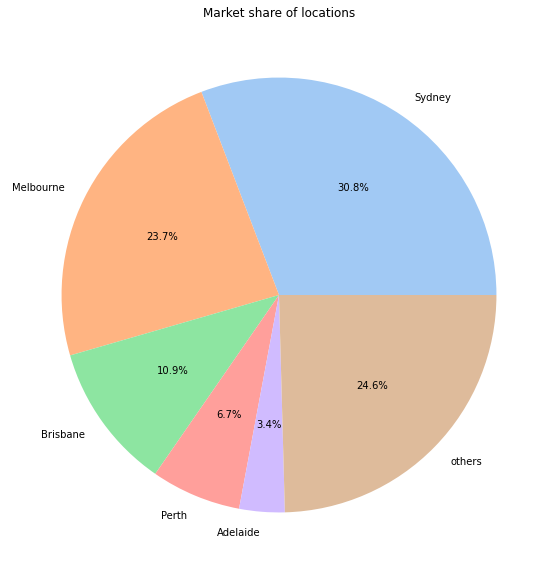

In [10]:
colors = sns.color_palette('pastel')[0:7]
fig = plt.figure(figsize=(10, 10))
plt.pie(data=locationDf, x=locationDf.Count, labels=locationDf.Location, colors=colors, autopct='%0.1f%%')
plt.title("Market share of locations")

## Breaking down each location

### Sydney:

In [69]:
Sydney_Df = df[df['Location'].isna()==False]
Sydney_Df = Sydney_Df[Sydney_Df['Location'] == "Sydney"]

Sydney_AreaDf = Sydney_Df.groupby('Area').count()
Sydney_AreaDf['Area'] = Sydney_AreaDf.index
Sydney_AreaDf['Count'] = Sydney_AreaDf['Id']

Sydney_ClassDf = Sydney_Df.groupby('Classification').count()
Sydney_ClassDf['Classification'] = Sydney_ClassDf.index
Sydney_ClassDf['Count'] = Sydney_ClassDf['Id']

Sydney_HighSalDf = Sydney_Df.groupby('HighestSalary').count()
Sydney_HighSalDf['HighSal'] = Sydney_HighSalDf.index
Sydney_HighSalDf['Count'] = Sydney_HighSalDf['Id']

print("Sydney Areas")
Sydney_AreaDf.head(10)

Sydney Areas


,Id,Title,Company,Date,Location,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,Area,Count
Area,,,,,,,,,,,,,,
"CBD, Inner West & Eastern Suburbs",29059,29059,28356,29059,29059,29059,29059,29059,27477,29059,29059,27485,"CBD, Inner West & Eastern Suburbs",29059
North Shore & Northern Beaches,6656,6656,6417,6656,6656,6656,6656,6656,6278,6656,6656,6278,North Shore & Northern Beaches,6656
North West & Hills District,1905,1905,1829,1905,1905,1905,1905,1905,1819,1905,1905,1819,North West & Hills District,1905
Parramatta & Western Suburbs,8769,8769,8399,8769,8769,8769,8769,8769,8244,8769,8769,8246,Parramatta & Western Suburbs,8769
Ryde & Macquarie Park,1960,1960,1916,1960,1960,1960,1960,1960,1827,1960,1960,1828,Ryde & Macquarie Park,1960
South West & M5 Corridor,3190,3190,2998,3190,3190,3190,3190,3190,3054,3190,3190,3054,South West & M5 Corridor,3190
Southern Suburbs & Sutherland Shire,2239,2239,2164,2239,2239,2239,2239,2239,2124,2239,2239,2124,Southern Suburbs & Sutherland Shire,2239


In [62]:
print("Sydney Classifications")
Sydney_ClassDf.head(10)

Sydney Classifications


,Id,Title,Company,Date,Location,Area,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,Classification,Count
Classification,,,,,,,,,,,,,,
Accounting,4010,4010,3918,4010,4010,3731,4010,4010,3778,4010,4010,3778,Accounting,4010
Administration & Office Support,3178,3178,3058,3178,3178,2993,3178,3178,2954,3178,3178,2954,Administration & Office Support,3178
"Advertising, Arts & Media",383,383,374,383,383,334,383,383,362,383,383,363,"Advertising, Arts & Media",383
Banking & Financial Services,2571,2571,2548,2571,2571,2304,2571,2571,2424,2571,2571,2424,Banking & Financial Services,2571
CEO & General Management,246,246,240,246,246,186,246,246,229,246,246,229,CEO & General Management,246
Call Centre & Customer Service,1624,1624,1586,1624,1624,1522,1624,1624,1506,1624,1624,1506,Call Centre & Customer Service,1624
Community Services & Development,831,831,827,831,831,754,831,831,796,831,831,796,Community Services & Development,831
Construction,2920,2920,2839,2920,2920,2427,2920,2920,2803,2920,2920,2803,Construction,2920
Consulting & Strategy,545,545,534,545,545,461,545,545,520,545,545,520,Consulting & Strategy,545


In [65]:
print("Sydney Most Common Highest Salaries")
Sydney_HighSalDf

Sydney Most Common Highest Salaries


,Id,Title,Company,Date,Location,Area,Classification,SubClassification,Requirement,FullDescription,LowestSalary,JobType,HighSal,Count
HighestSalary,,,,,,,,,,,,,,
30,11753,11753,11364,11753,11753,10488,11753,11753,11753,10090,11753,10092,30,11753
40,3969,3969,3791,3969,3969,3791,3969,3969,3969,3727,3969,3728,40,3969
50,5371,5371,5029,5371,5371,5005,5371,5371,5371,5257,5371,5259,50,5371
60,4861,4861,4655,4861,4861,4522,4861,4861,4861,4718,4861,4721,60,4861
70,5288,5288,5067,5288,5288,4784,5288,5288,5288,5143,5288,5145,70,5288
80,5033,5033,4899,5033,5033,4396,5033,5033,5033,4867,5033,4868,80,5033
100,3738,3738,3646,3738,3738,3218,3738,3738,3738,3678,3738,3678,100,3738
120,5579,5579,5488,5579,5579,4839,5579,5579,5579,5410,5579,5411,120,5579
150,5706,5706,5639,5706,5706,4869,5706,5706,5706,5508,5706,5508,150,5706


In [52]:
#Sort by descending to have the top 5 AREAS at the top
Sydney_AreaDf = Sydney_AreaDf.sort_values(by="Count", ascending=False)
#Copy the top 5 countries
df2 = Sydney_AreaDf[:5].copy()
#Add a new row that will be all of the AREAS under the top 5, rename to
#others and set as the sum of all of their counts
new_row = pd.DataFrame(data = {'Area' : ['others'],
                              'Count' : [Sydney_AreaDf['Count'][5:].sum()]
                              })
#Overwrite the dataframe with the concatenation of these two
Sydney_AreaDf = pd.concat([df2, new_row])

#Sort by descending to have the top 5 CLASSIFICATIONS at the top
Sydney_ClassDf = Sydney_ClassDf.sort_values(by="Count", ascending=False)
#Copy the top 5 countries
df2 = Sydney_ClassDf[:15].copy()
#Add a new row that will be all of the CLASSIFICATIONS under the top 5, rename to
#others and set as the sum of all of their counts
new_row = pd.DataFrame(data = {'Classification' : ['others'],
                              'Count' : [Sydney_ClassDf['Count'][15:].sum()]
                              })
#Overwrite the dataframe with the concatenation of these two
Sydney_ClassDf = pd.concat([df2, new_row])
Sydney_AreaDf.head(5)

,Id,Title,Company,Date,Location,Classification,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,Area,Count
"CBD, Inner West & Eastern Suburbs",29059.0,29059.0,28356.0,29059.0,29059.0,29059.0,29059.0,29059.0,27477.0,29059.0,29059.0,27485.0,"CBD, Inner West & Eastern Suburbs",29059
Parramatta & Western Suburbs,8769.0,8769.0,8399.0,8769.0,8769.0,8769.0,8769.0,8769.0,8244.0,8769.0,8769.0,8246.0,Parramatta & Western Suburbs,8769
North Shore & Northern Beaches,6656.0,6656.0,6417.0,6656.0,6656.0,6656.0,6656.0,6656.0,6278.0,6656.0,6656.0,6278.0,North Shore & Northern Beaches,6656
South West & M5 Corridor,3190.0,3190.0,2998.0,3190.0,3190.0,3190.0,3190.0,3190.0,3054.0,3190.0,3190.0,3054.0,South West & M5 Corridor,3190
Southern Suburbs & Sutherland Shire,2239.0,2239.0,2164.0,2239.0,2239.0,2239.0,2239.0,2239.0,2124.0,2239.0,2239.0,2124.0,Southern Suburbs & Sutherland Shire,2239


In [53]:
Sydney_ClassDf.head(10)

,Id,Title,Company,Date,Location,Area,SubClassification,Requirement,FullDescription,LowestSalary,HighestSalary,JobType,Classification,Count
Information & Communication Technology,9548.0,9548.0,9364.0,9548.0,9548.0,8176.0,9548.0,9548.0,8946.0,9548.0,9548.0,8946.0,Information & Communication Technology,9548
Hospitality & Tourism,4074.0,4074.0,3966.0,4074.0,4074.0,3862.0,4074.0,4074.0,3741.0,4074.0,4074.0,3745.0,Hospitality & Tourism,4074
Trades & Services,4026.0,4026.0,3679.0,4026.0,4026.0,3519.0,4026.0,4026.0,3866.0,4026.0,4026.0,3866.0,Trades & Services,4026
Accounting,4010.0,4010.0,3918.0,4010.0,4010.0,3731.0,4010.0,4010.0,3778.0,4010.0,4010.0,3778.0,Accounting,4010
Healthcare & Medical,3339.0,3339.0,3174.0,3339.0,3339.0,2751.0,3339.0,3339.0,3225.0,3339.0,3339.0,3225.0,Healthcare & Medical,3339
"Manufacturing, Transport & Logistics",3308.0,3308.0,3091.0,3308.0,3308.0,3057.0,3308.0,3308.0,3170.0,3308.0,3308.0,3171.0,"Manufacturing, Transport & Logistics",3308
Administration & Office Support,3178.0,3178.0,3058.0,3178.0,3178.0,2993.0,3178.0,3178.0,2954.0,3178.0,3178.0,2954.0,Administration & Office Support,3178
Sales,3139.0,3139.0,3020.0,3139.0,3139.0,2601.0,3139.0,3139.0,3018.0,3139.0,3139.0,3018.0,Sales,3139
Construction,2920.0,2920.0,2839.0,2920.0,2920.0,2427.0,2920.0,2920.0,2803.0,2920.0,2920.0,2803.0,Construction,2920
Banking & Financial Services,2571.0,2571.0,2548.0,2571.0,2571.0,2304.0,2571.0,2571.0,2424.0,2571.0,2571.0,2424.0,Banking & Financial Services,2571


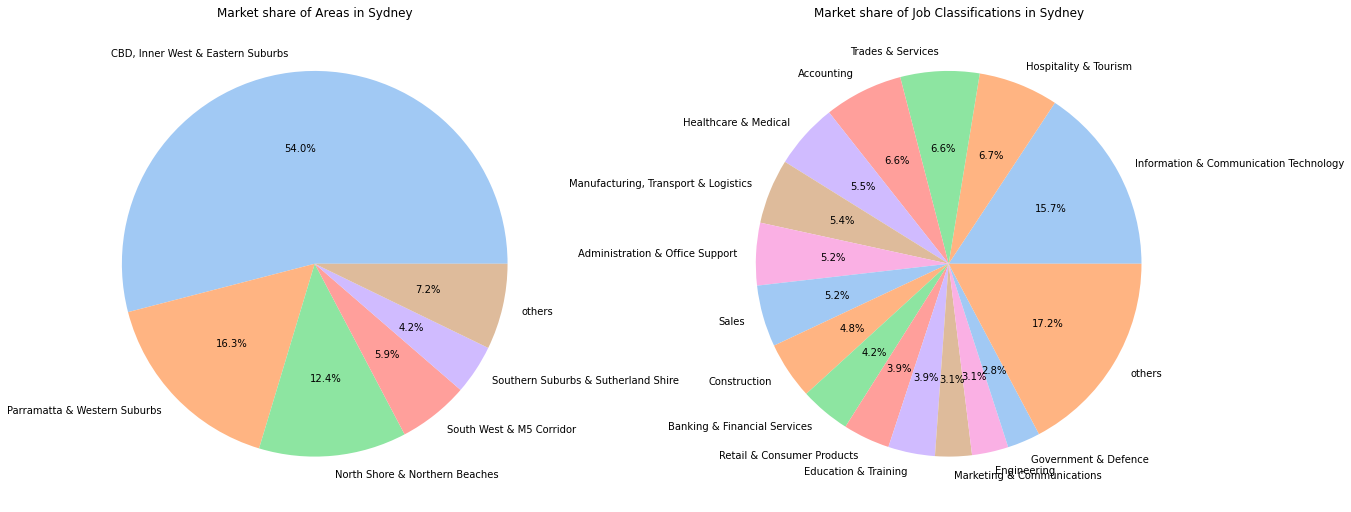

In [54]:
colors = sns.color_palette('pastel')[0:7]
# %matplotlib qt
%matplotlib inline
fig = plt.figure(figsize=(20, 20))
plt.subplot(221)
plt.pie(data=Sydney_AreaDf, x=Sydney_AreaDf.Count, labels=Sydney_AreaDf.Area, colors=colors, autopct='%0.1f%%')
plt.title("Market share of Areas in Sydney")

plt.subplot(222)
plt.pie(data=Sydney_ClassDf, x=Sydney_ClassDf.Count, labels=Sydney_ClassDf.Classification, colors=colors, autopct='%0.1f%%')
plt.title("Market share of Job Classifications in Sydney")






plt.subplots_adjust(wspace = 0.315)

NEED TO DO TWO VARIABLE ANALYSIS. E.G. WHERE ARE THE HIGHEST PAID SALARIES IN EACH AREA?

Need to prime the data for analysis section so need:

1. What is the sector, sub-sector of each job?
2. Where is the location of each job?
3. What is the range of salaries for each job?

Now, study the market by locations:
1. What is the market size in each city? What are the hottest job sectors in each city?
2. Which range of salary is common in each city? Where are the employees more well-paid?
3. Can you detect the pattern of posting: e.g. Are more jobs posted at the beginning of the month?

Now, study the market by sectors:
1. Which sectors keep the highest market share?
2. In each sector, which sub-sectors are the main spotlights?
3. What is the salary range for each sector/sub-sector? Can you compare the salary range between sectors/subsectors?
4. What is the trending of the market, i.e., if a high school student asks you which subject should he/she learn in the university (to guarantee a job in the future), what is your advice?
5. Can you detect which skills are required in each sector?

Keep in mind these sectors / locations that need to be considered when cleaning the data. Think about sub data frames that need to be made and think of the correlations that need to be found. 